# **EP1 - MAC0219**

## **Gustavo Santos Morais** - 11221932

## **Matheus Barbosa Silva** - 11221741

# **Preâmbulo**
Para a medição de tempo nos testes seguintes, foi utilizado o comando time com alterações nos programas principais.

**Configurações da máquina utilizada nos testes:** Sistema Operacional Debian 10.8, CPU Ryzen 7 3700U.

In [84]:
import Pkg
using Pkg
Pkg.add("StatsPlots")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("CategoricalArrays")
using StatsPlots
using CSV
using DataFrames
using Statistics
using CategoricalArrays

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


# Mandelbrot - Sequencial

A análise do consumo de tempo do algoritmo sequencial para o cálculo do conjunto de Mandelbrot foi feita observando-se independentemente cada um dos seguintes aspectos:
- **Tamanho da saída:** dimensões da matriz tridimensional calculada para a região dada (correspondente às dimensões da imagem `output.ppm` gerada quando as operações de I/O estão habilitadas). Foram consideradas apenas saídas de altura e largura potências de 2 ($2^4,...,2^{13}$);
- **Regiões:** regiões do conjunto de Mandelbrot calculadas pelo algoritmo (_Elephant_, _Seahorse_, _Triple Spiral_ e _Full Picture_);
- **Uso das operações de I/O e Alocação de Memória**;
- **Variação do consumo de tempo**: comprimento do intervalo de confiança e distância do máximo e mínimo das medições em relação à mediana dos dados;

Para cada um dos cenários (**com** e **sem** I/O e alocação de memória para cada uma das regiões e tamanhos de saída) foram feitas dez medições do consumo de tempo do algoritmo e a partir desses dados foram gerados boxplots e gráficos de barra para as médias (com **intervalo de confiança de 95%**).

## Tamanho da Saída
Como esperado, este parâmetro foi o mais influente no aumento da quantidade de tempo usada pelo algoritmo. Nestes cenários, o consumo de tempo (nos casos com e sem I/O e alocação de memória) cresceu proporcionalmente ao tamanho da saída -- que, neste caso, aumentava **exponencialmente**.

Portanto, é possível observar (tanto no boxplot como no gráfico de médias) uma tendência exponencial no crescimento do consumo de tempo, seguindo o aumento do tamanho da saída.

## Regiões
Nota-se que cada uma das regiões dadas apresenta um comportamento próprio quanto ao consumo de tempo. Isto é, algumas regiões levam, naturalmente, mais tempo para que se possa convergir a um valor em cada ponto da imagem, enquanto outras (menos "detalhadas") convergem mais rapidamente.

Para as regiões _Elephant_, _Seahorse_ e _Triple Spiral_, o consumo de tempo é maior com relação à _Full Picture_ em todos os testes dado o maior nível de detalhamento necessário (com relação às cores da imagem gerada), com tempo que usualmente chegava a até 150s.

Já a região _Full Picture_ foi a que levou menos tempo para ser calculada em todos os testes, com tempo que usualmente não passava de 25s.

## Impacto das Operações de I/O e Alocação de Memória

Como esperado, o tempo despendido para a alocação de memória e operações de I/O é proporcional ao tamanho da saída.

Em média, o tempo de execução do algoritmo sem I/O e alocações de memória está abaixo do tempo médio gasto pelo mesmo algoritmo, mas com I/O e alocações de memória. Além disso, em todos os cenários o consumo de tempo mínimo ocorreu no caso sem I/O e alocações de memória.

Nota-se que o impacto do tamanho da saída é maior que o das operações de I/O e alocações de memória.

## Variação do consumo de tempo

Com a análise dos boxplots e intervalos de confiança dos gráficos de médias, fica claro que para maiores tamanhos de saída, há uma maior variação do consumo de tempo (perceptível pelo comprimento do intervalo de confiança e distância do máximo e mínimo dos dados com relação à mediana).

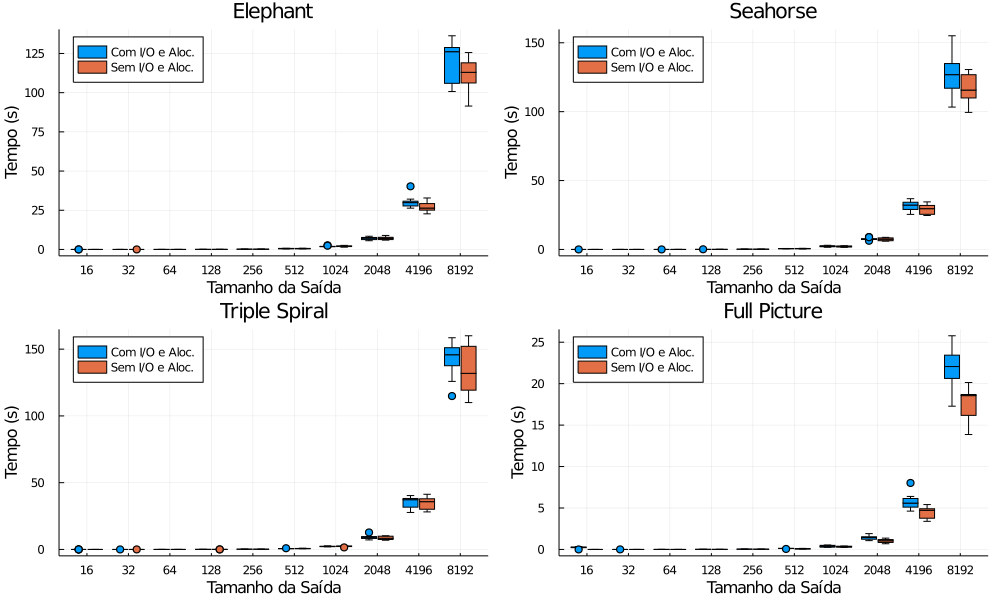

In [85]:
dataIoPaths = [ "../tests/seq/with-IO-Aloc/elephant.csv",
                "../tests/seq/with-IO-Aloc/seahorse.csv",
                "../tests/seq/with-IO-Aloc/triple_spiral.csv",
                "../tests/seq/with-IO-Aloc/full.csv"]
dataNoIoPaths = [ "../tests/seq/no-IO-Aloc/elephant.csv",
                "../tests/seq/no-IO-Aloc/seahorse.csv",
                "../tests/seq/no-IO-Aloc/triple_spiral.csv",
                "../tests/seq/no-IO-Aloc/full.csv"]
titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]

xBoxplot = repeat(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"], outer=20)
xBar = CategoricalArray(repeat(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"], outer=2))
levels!(xBar, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
pBoxplot = []
pBar = []

for i in 1:4
    vBoxplot = []
    wBoxplot = []
    vBar = []
    wBar = []
    confint = []
    dataIO = CSV.read(dataIoPaths[i], DataFrame)
    dataNoIO = CSV.read(dataNoIoPaths[i], DataFrame)
    
    for row in eachrow(dataIO)
        vBoxplot = [vBoxplot;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end

    for column in eachcol(dataIO)
        a = mean(column)
        vBar = [vBar;a]
        push!(confint, 1.96*std(column)/sqrt(10))
    end

    for row in eachrow(dataNoIO)
        wBoxplot = [wBoxplot;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
    end

    for column in eachcol(dataNoIO)
        a = mean(column)
        wBar = [wBar;a]
        push!(confint, 1.96*std(column)/sqrt(10))
    end
    yBoxplot = [vBoxplot;vec(wBoxplot)]
    yBar = [vBar;vec(wBar)]
    yBar = convert(Array{Float64}, yBar)

    push!(pBoxplot, groupedboxplot(xBoxplot, yBoxplot, bar_width = 0.8,
                    group = repeat(["Com I/O e Aloc.", "Sem I/O e Aloc."], inner = 100),
                    xlabel = "Tamanho da Saída", ylabel="Tempo (s)", legend=:topleft))
    push!(pBar, groupedbar(xBar, yBar, yerr=confint,
                group = repeat(["Com I/O e Aloc.", "Sem I/O e Aloc."], inner = 10),
                xlabel = "Tamanho da Saída", ylabel="Tempo (s)", legend=:topleft))
end
plot(pBoxplot[1], pBoxplot[2], pBoxplot[3], pBoxplot[4], title = titles, layout = (2,2))
plot!(size=(1000,600))

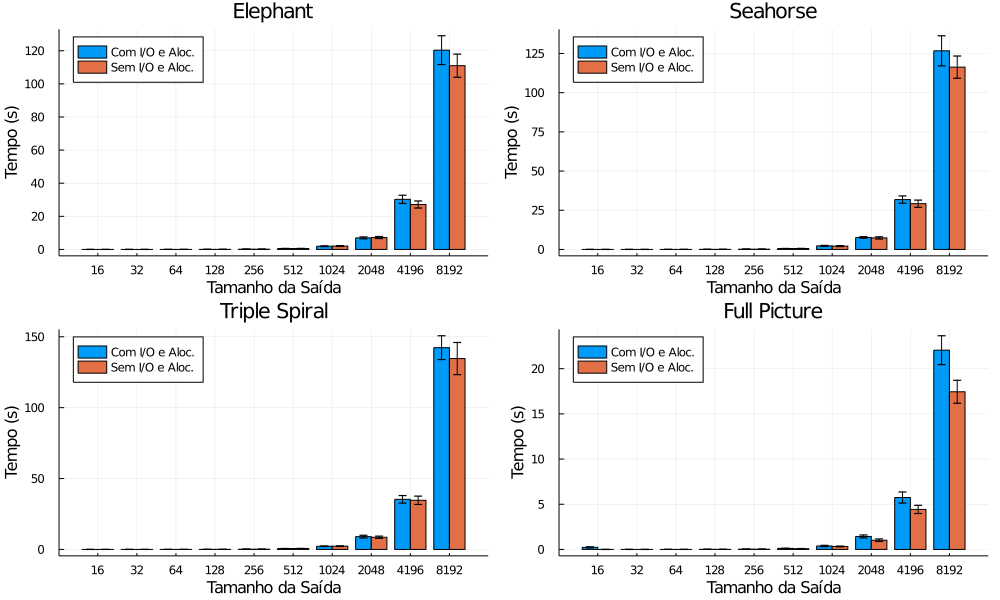

In [86]:
plot(pBar[1], pBar[2], pBar[3], pBar[4], title = titles, layout = (2,2))
plot!(size=(1000,600))

<strong><h1>Mandelbrot - Pthreads</h1></strong>

A análise do consumo de tempo do algoritmo paralelo utilizando a biblioteca `Pthreads` para o cálculo do conjunto de Mandelbrot foi feita observando-se independentemente cada um dos seguintes aspectos:
- **Tamanho da saída:** dimensões da matriz tridimensional calculada para a região dada (correspondente às dimensões da imagem `output.ppm` gerada quando as operações de I/O estão habilitadas). Foram consideradas apenas saídas de altura e largura potências de 2 ($2^4,...,2^{13}$);
- **Regiões:** regiões do conjunto de Mandelbrot calculadas pelo algoritmo (_Elephant_, _Seahorse_, _Triple Spiral_ e _Full Picture_);
- **Número de threads:** número de threads utilizadas para dividir o trabalho feito pelo algoritmo. Foi considerado que o número de threads é potência de 2 ($2^0,...,2^5$);
- **Variação do consumo de tempo**: comprimento do intervalo de confiança e distância do máximo e mínimo das medições em relação à mediana dos dados;
- **Comparação com o algoritmo sequencial:** comparação do consumo de tempo do algoritmo paralelo usando pthreads com o sequencial.

Para cada um dos cenários (para todas as quantidades de threads, e cada uma das regiões e tamanhos de saída) foram feitas dez medições do consumo de tempo do algoritmo e a partir desses dados foram gerados boxplots e gráficos de barra para as médias (com **intervalo de confiança de 95%**).

## Tamanho da Saída
Como esperado, este parâmetro foi o mais influente no aumento da quantidade de tempo usada pelo algoritmo. Nestes cenários, o consumo de tempo (para todas as quantidades de threads) cresceu proporcionalmente ao tamanho da saída -- que, neste caso, aumentava **exponencialmente**.

Portanto, é possível observar (tanto no boxplot como no gráfico de médias) uma tendência exponencial no crescimento do consumo de tempo, seguindo o aumento do tamanho da saída.

## Regiões
Nota-se que cada uma das regiões dadas apresenta um comportamento próprio quanto ao consumo de tempo. Isto é, algumas regiões levam, naturalmente, mais tempo para que se possa convergir a um valor em cada ponto da imagem, enquanto outras (menos "detalhadas") convergem mais rapidamente.

Para as regiões _Elephant_, _Seahorse_ e _Triple Spiral_, o consumo de tempo é maior com relação à _Full Picture_ em todos os testes dado o maior nível de detalhamento necessário (com relação às cores da imagem gerada), com tempo que usualmente chegava a até 250s.

Já a região _Full Picture_ foi a que levou menos tempo para ser calculada em todos os testes, com tempo que usualmente não passava de 50s.

## Número de threads

Em relação à quantidade de threads usada no algoritmo paralelo, percebe-se no geral uma melhora no desempenho conforme se aumenta essa quantidade para os casos das regiões _Elephant_, _Seahorse_ e _Triple Spiral_, mas para a região _Full Picture_, essa regra não se aplica. Na verdade, para essa região obteve-se o pior desempenho com 32 threads, e o melhor com 8 threads.

Isso mostra que quando utilizamos a biblioteca `Phreads`, aumentar o número de threads não implica diretamente na diminuição do consumo de tempo do algoritmo (ou seja, deve-se verificar de forma empírica qual é a quantidade ideal de threads para o algoritmo em questão).

## Variação do consumo de tempo

Com a análise dos boxplots e intervalos de confiança dos gráficos de médias, fica claro que para maiores tamanhos de saída e  para maior número de threads, há uma maior variação do consumo de tempo (perceptível pelo comprimento do intervalo de confiança e distância do máximo e mínimo dos dados com relação à mediana).

## Comparação com o algoritmo sequencial

Observando os dados obtidos para o algoritmo paralelo utilizando a biblioteca `Pthreads`, consegue-se percebe uma diminuição no consumo de tempo de aproximadamente 66% em relação ao algoritmo sequencial. 

Isso deixa claro que o ganho de desempenho em relação ao algoritmo sequencial é significativamente grande.

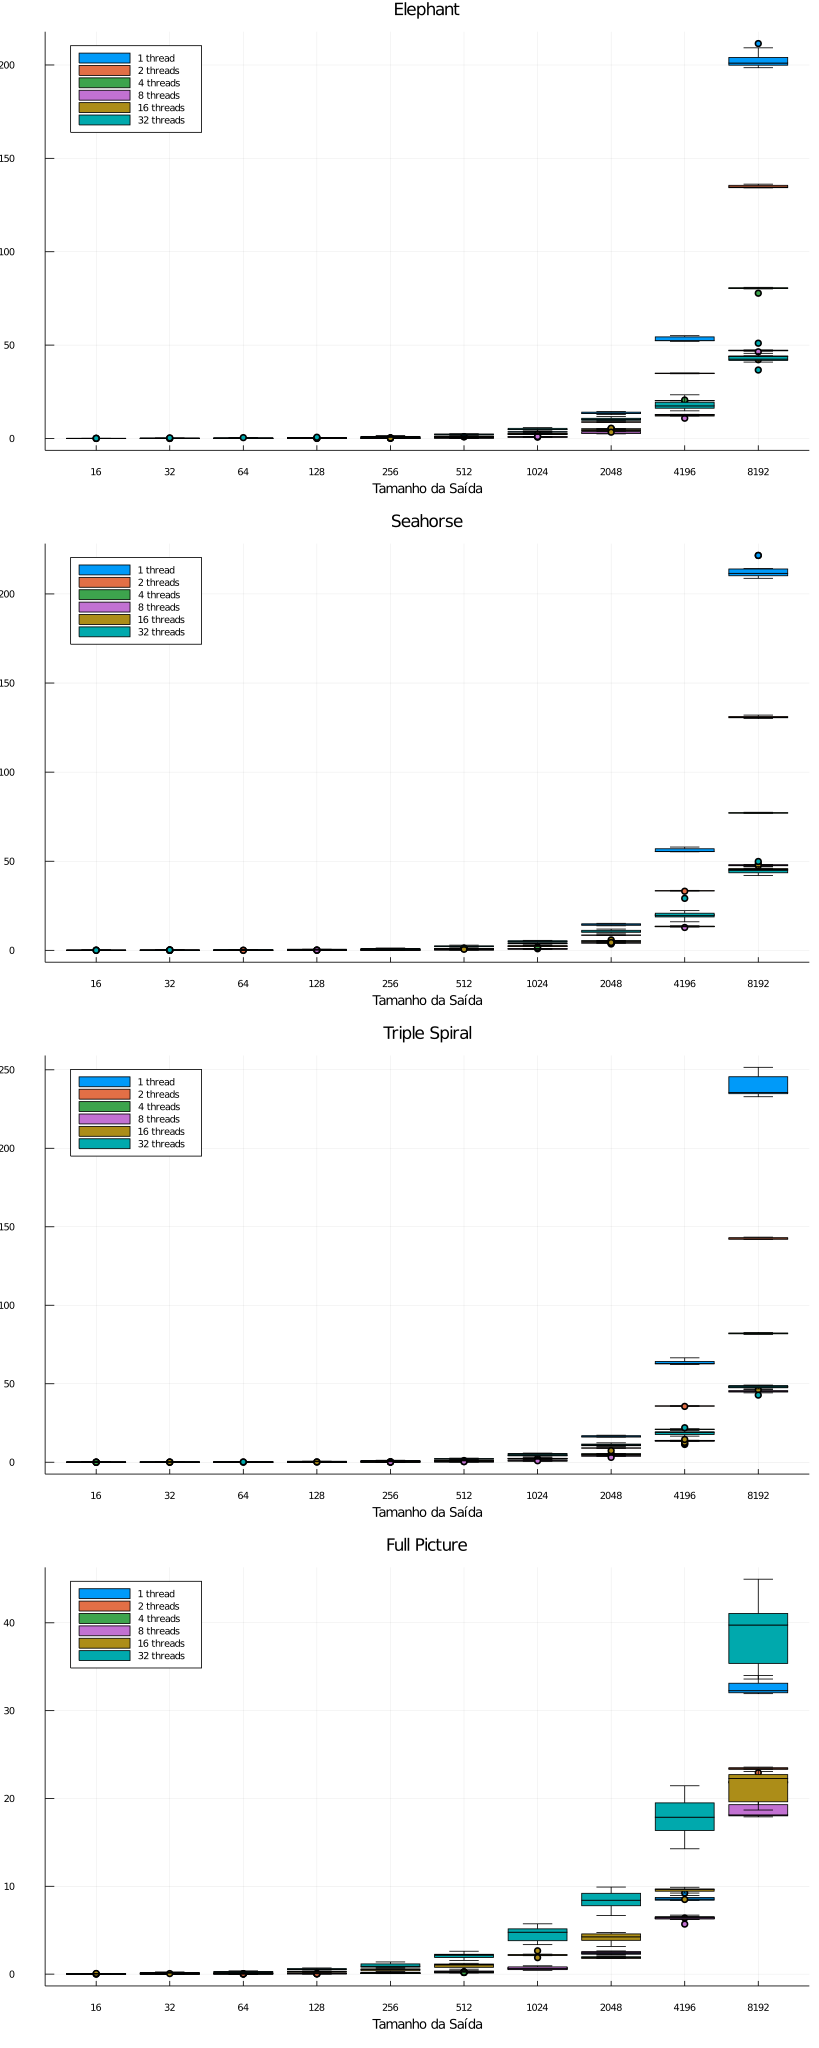

In [101]:
dataElephantPaths = [ "../tests/pth/elephant/elephant_1.csv",
                    "../tests/pth/elephant/elephant_2.csv",
                    "../tests/pth/elephant/elephant_4.csv",
                    "../tests/pth/elephant/elephant_8.csv",
                    "../tests/pth/elephant/elephant_16.csv",
                    "../tests/pth/elephant/elephant_32.csv"]

dataSeahorsePaths = [ "../tests/pth/seahorse/seahorse_1.csv",
                    "../tests/pth/seahorse/seahorse_2.csv",
                    "../tests/pth/seahorse/seahorse_4.csv",
                    "../tests/pth/seahorse/seahorse_8.csv",
                    "../tests/pth/seahorse/seahorse_16.csv",
                    "../tests/pth/seahorse/seahorse_32.csv"]

dataTSPaths = [ "../tests/pth/triple_spiral/triple_spiral_1.csv",
                "../tests/pth/triple_spiral/triple_spiral_2.csv",
                "../tests/pth/triple_spiral/triple_spiral_4.csv",
                "../tests/pth/triple_spiral/triple_spiral_8.csv",
                "../tests/pth/triple_spiral/triple_spiral_16.csv",
                "../tests/pth/triple_spiral/triple_spiral_32.csv"]

dataFullPaths = [ "../tests/pth/full/full_1.csv",
                "../tests/pth/full/full_2.csv",
                "../tests/pth/full/full_4.csv",
                "../tests/pth/full/full_8.csv",
                "../tests/pth/full/full_16.csv",
                "../tests/pth/full/full_32.csv"]

titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]
dataPaths = [dataElephantPaths, dataSeahorsePaths, dataTSPaths, dataFullPaths]

titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]
dataPaths = [dataElephantPaths, dataSeahorsePaths, dataTSPaths, dataFullPaths]

x = CategoricalArray(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
levels!(x, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
legends = ["1 thread", "2 threads", "4 threads", "8 threads", "16 threads", "32 threads"]
p = []

for j in 1:4
    boxplotRegion = plot()
    for i in 1:6
        v = []
        w = []
        confint = []
        data = CSV.read(dataPaths[j][i], DataFrame)

        for row in eachrow(data)
            v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
        end

        for column in eachcol(data)
            a = mean(column)
            w = [w;a]
            push!(confint, 1.96*std(column)/sqrt(10))
        end

        boxplotRegion = groupedboxplot!(x, vec(v), bar_width = 0.8, xlabel = "Tamanho da Saída", ylabel="Tempo (s)", legend=:topleft, label=legends[i])
    end
    push!(p, boxplotRegion)
end

plot(p[1], p[2], p[3], p[4], title = titles, layout = (4,1))
plot!(size=(1000,2500))

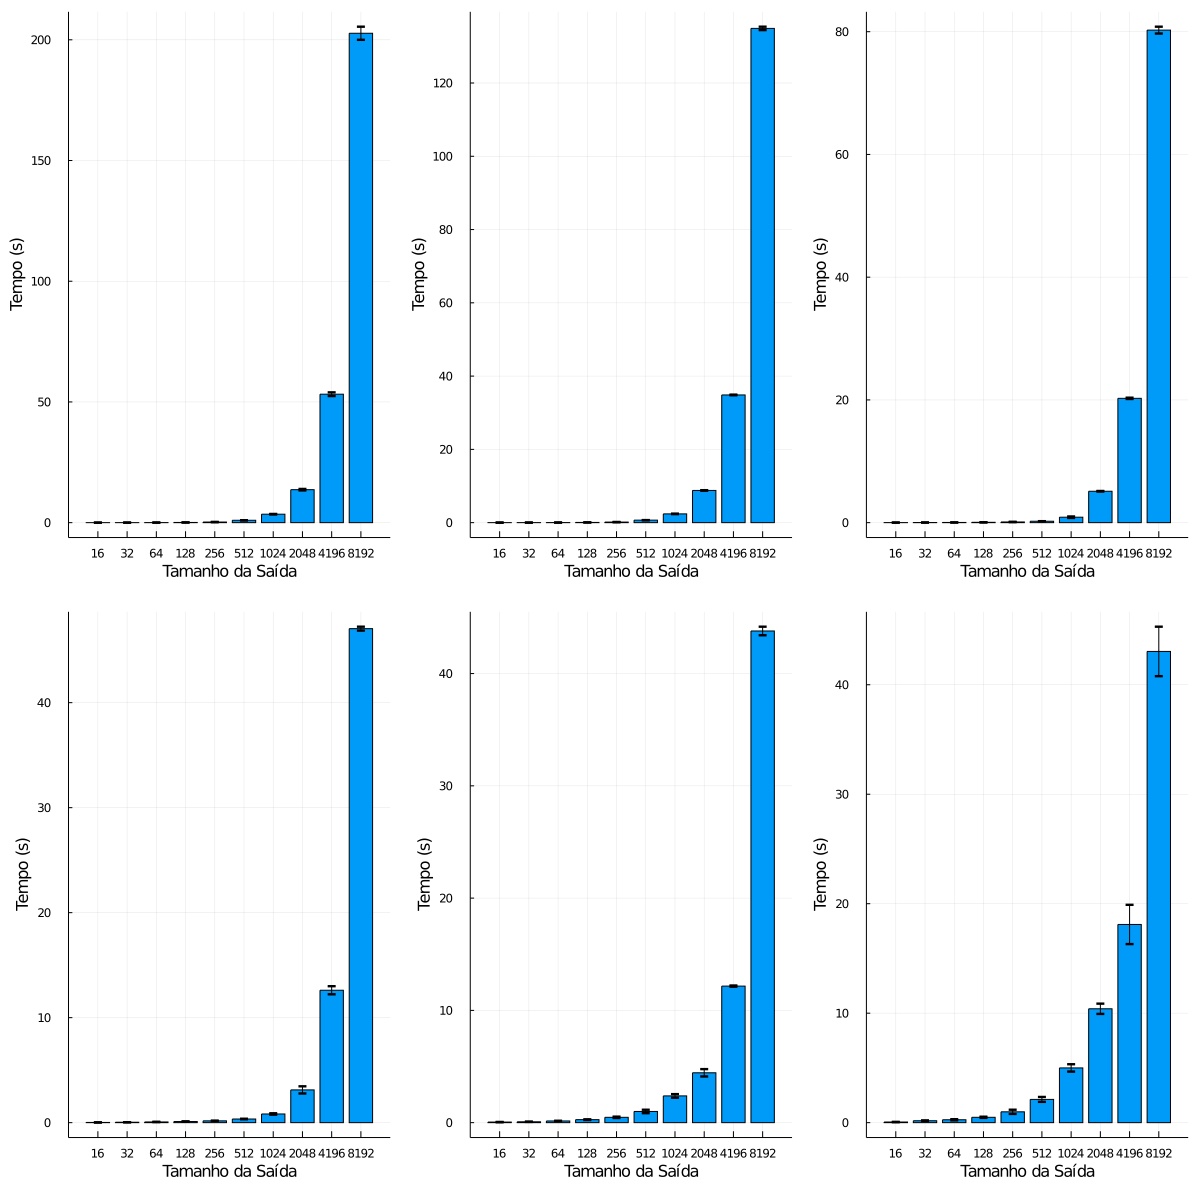

In [102]:
p = []
x = CategoricalArray(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
levels!(x, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
xticksBar = (1:10, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])

for j in 1:4
    for i in 1:6
        v = []
        confint = []
        data = CSV.read(dataPaths[j][i], DataFrame)

        for column in eachcol(data)
            a = mean(column)
            v = [v;a]
            push!(confint, 1.96*std(column)/sqrt(10))
        end

        push!(p, bar(x, v, yerr=confint, xticks=xticksBar, legend=false,
              xlabel="Tamanho da Saída", ylabel="Tempo (s)"))
    end
end

legends = ["1 th." "2 th." "4 th." "8 th." "16 th." "32 th."]
barTitles = legends .* " - Elephant"
plot(p[1], p[2], p[3], p[4], p[5], p[6],
     titles = barTitles, layout = (2,3))
plot!(size=(1200,1200))

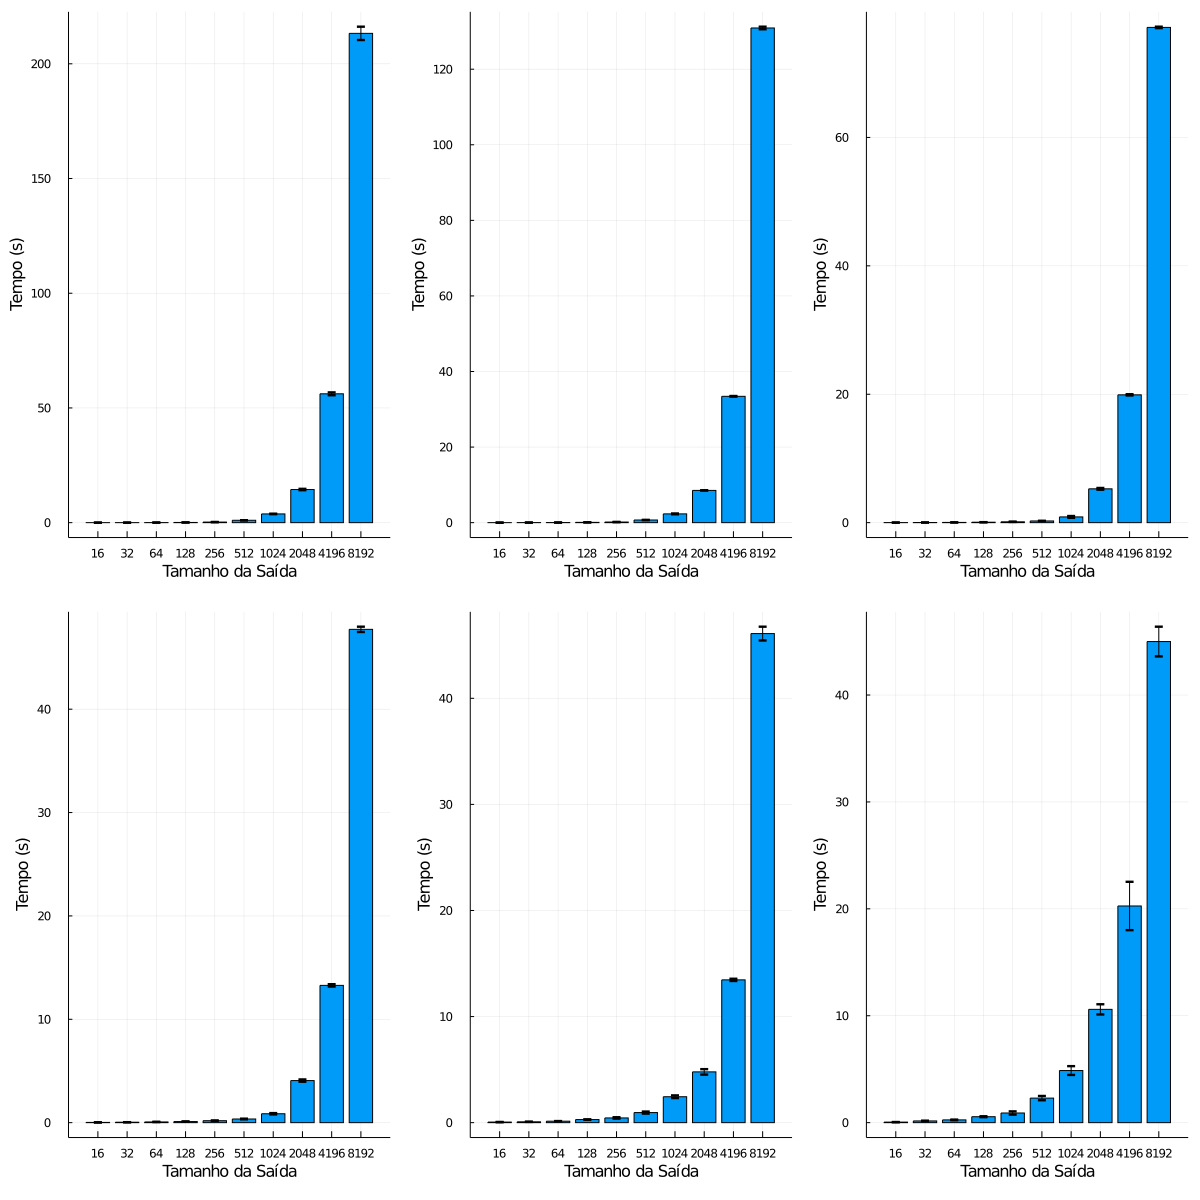

In [103]:
barTitles = legends .* " - Seahorse"
plot(p[7], p[8], p[9], p[10], p[11], p[12],
     titles = barTitles, layout = (2,3))
plot!(size=(1200,1200))

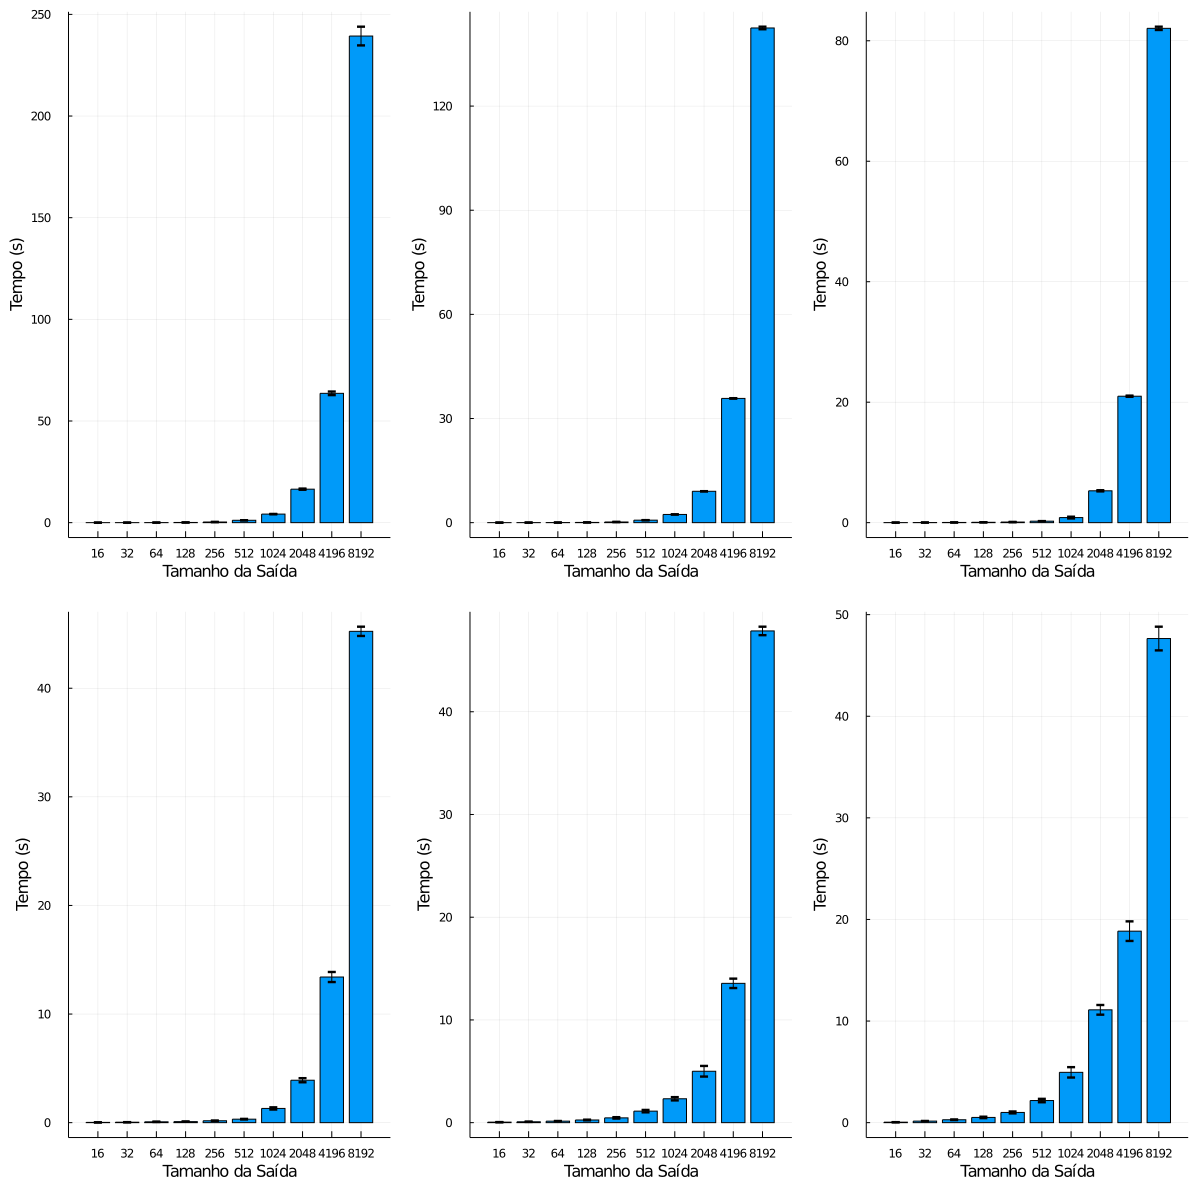

In [104]:
barTitles = legends .* " - Triple Spiral"
plot(p[13], p[14], p[15], p[16], p[17], p[18],
     titles = barTitles, layout = (2,3))
plot!(size=(1200,1200))

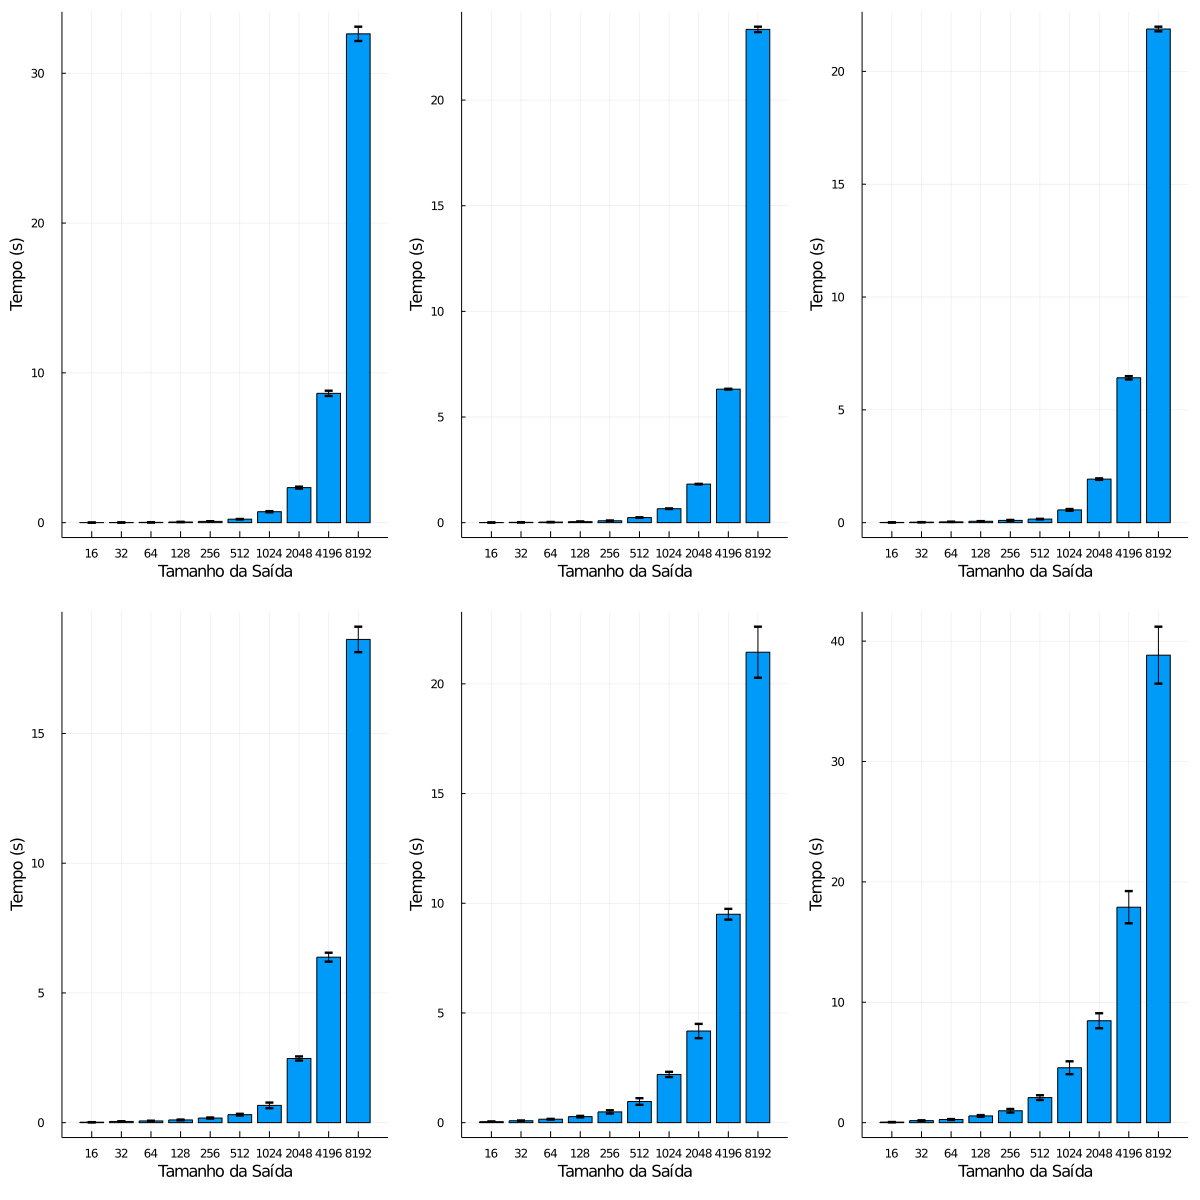

In [105]:
barTitles = legends .* " - Full Picture"
plot(p[19], p[20], p[21], p[22], p[23], p[24],
     titles = barTitles, layout = (2,3))
plot!(size=(1200,1200))

<strong><h1>Mandelbrot - OpenMP</h1></strong>
Texto pode ser digitado aqui

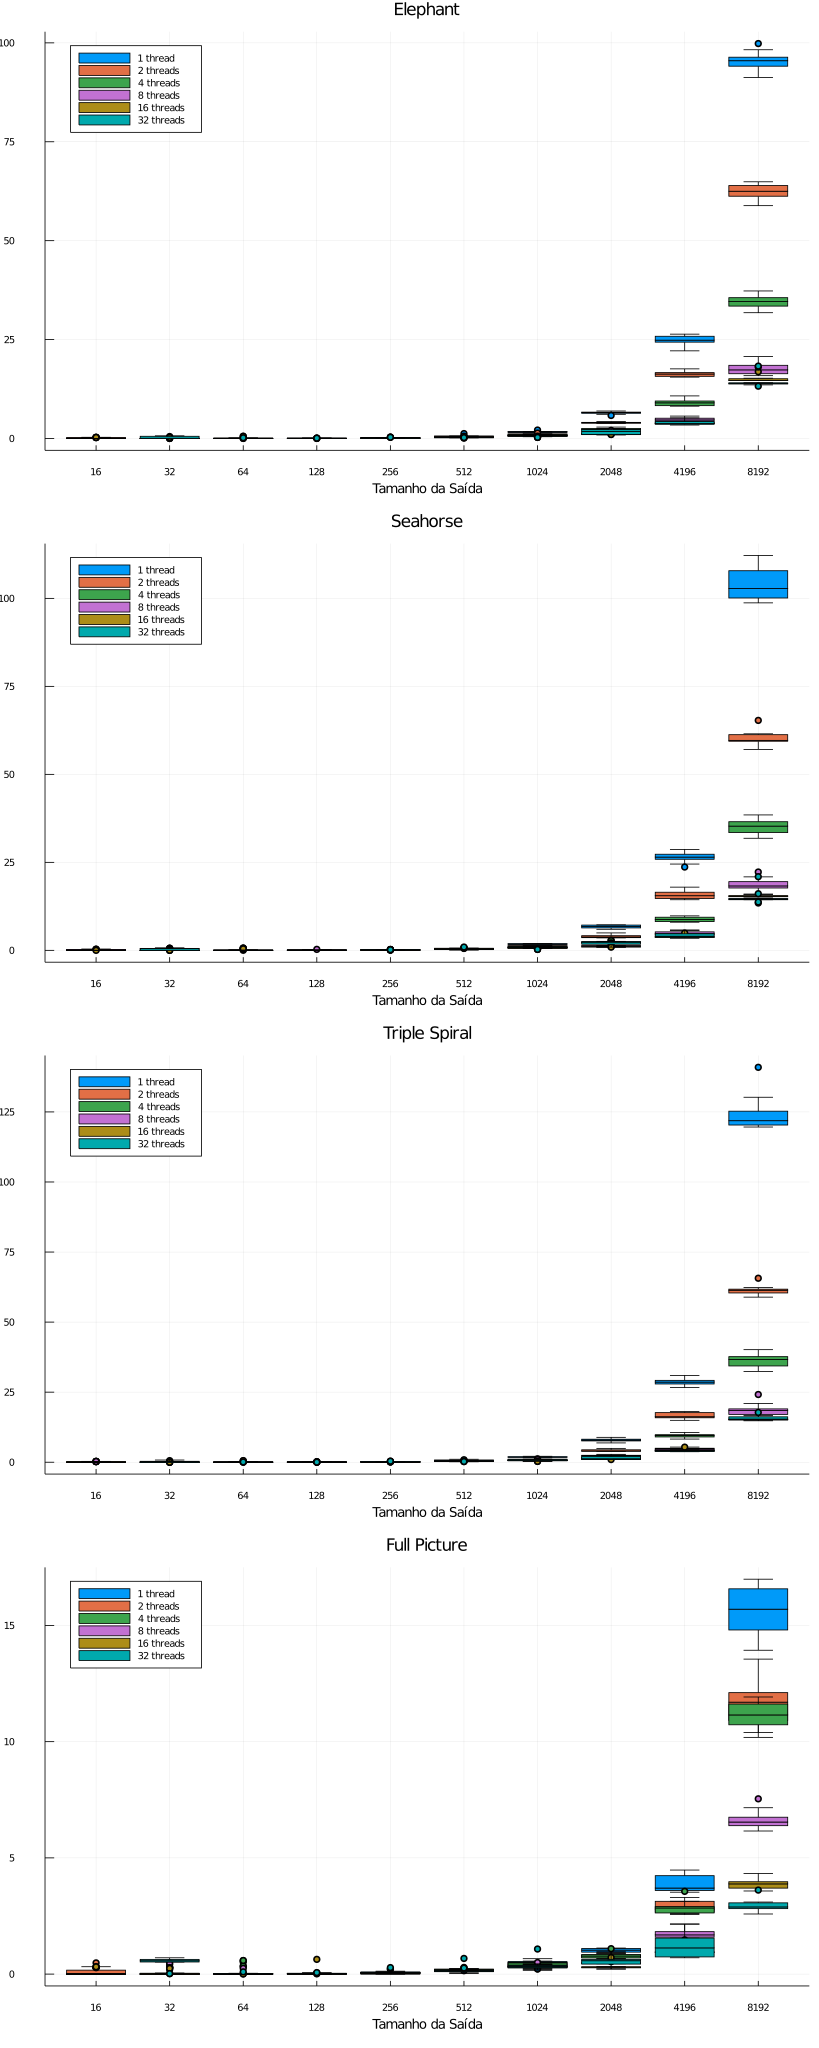

In [92]:
dataElephantPaths = [ "../tests/omp/elephant/elephant_1.csv",
                    "../tests/omp/elephant/elephant_2.csv",
                    "../tests/omp/elephant/elephant_4.csv",
                    "../tests/omp/elephant/elephant_8.csv",
                    "../tests/omp/elephant/elephant_16.csv",
                    "../tests/omp/elephant/elephant_32.csv"]

dataSeahorsePaths = [ "../tests/omp/seahorse/seahorse_1.csv",
                    "../tests/omp/seahorse/seahorse_2.csv",
                    "../tests/omp/seahorse/seahorse_4.csv",
                    "../tests/omp/seahorse/seahorse_8.csv",
                    "../tests/omp/seahorse/seahorse_16.csv",
                    "../tests/omp/seahorse/seahorse_32.csv"]

dataTSPaths = [ "../tests/omp/triple_spiral/triple_spiral_1.csv",
                "../tests/omp/triple_spiral/triple_spiral_2.csv",
                "../tests/omp/triple_spiral/triple_spiral_4.csv",
                "../tests/omp/triple_spiral/triple_spiral_8.csv",
                "../tests/omp/triple_spiral/triple_spiral_16.csv",
                "../tests/omp/triple_spiral/triple_spiral_32.csv"]

dataFullPaths = [ "../tests/omp/full/full_1.csv",
                "../tests/omp/full/full_2.csv",
                "../tests/omp/full/full_4.csv",
                "../tests/omp/full/full_8.csv",
                "../tests/omp/full/full_16.csv",
                "../tests/omp/full/full_32.csv" ]

titles = ["Elephant" "Seahorse" "Triple Spiral" "Full Picture"]
dataPaths = [dataElephantPaths, dataSeahorsePaths, dataTSPaths, dataFullPaths]

x = CategoricalArray(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
levels!(x, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
legends = ["1 thread", "2 threads", "4 threads", "8 threads", "16 threads", "32 threads"]
p = []

for j in 1:4
    boxplotRegion = plot()
    for i in 1:6
        v = []
        w = []
        confint = []
        data = CSV.read(dataPaths[j][i], DataFrame)

        for row in eachrow(data)
            v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
        end

        for column in eachcol(data)
            a = mean(column)
            w = [w;a]
            push!(confint, 1.96*std(column)/sqrt(10))
        end

        boxplotRegion = groupedboxplot!(x, vec(v), bar_width = 0.8, xlabel = "Tamanho da Saída", ylabel="Tempo (s)", legend=:topleft, label=legends[i])
    end
    push!(p, boxplotRegion)
end

plot(p[1], p[2], p[3], p[4], title = titles, layout = (4,1))
plot!(size=(1000,2500))

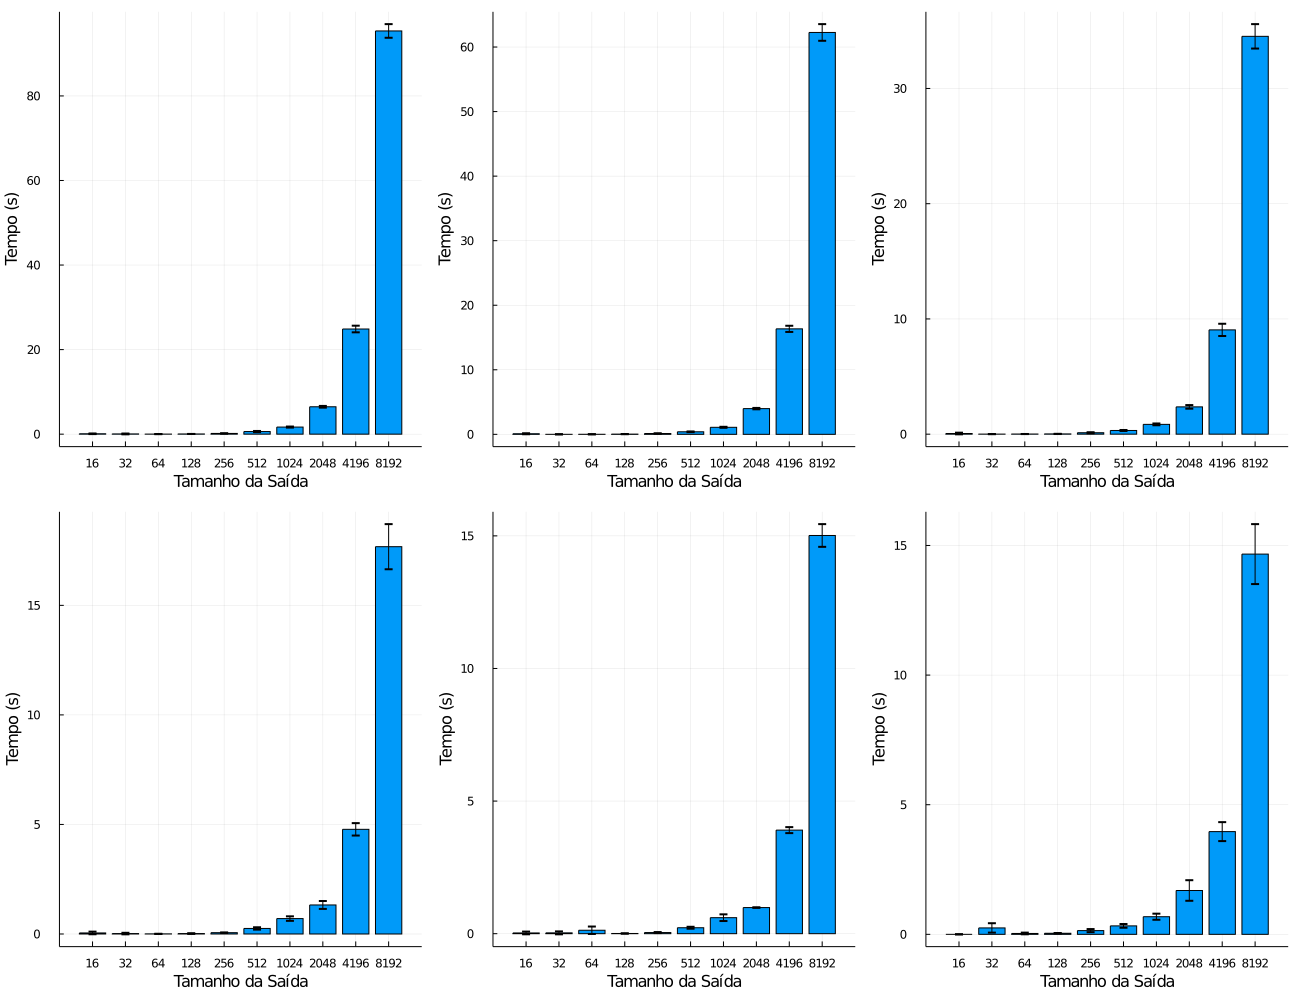

In [93]:
p = []
x = CategoricalArray(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
levels!(x, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])
xticksBar = (1:10, ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"])

for j in 1:4
    for i in 1:6
        v = []
        confint = []
        data = CSV.read(dataPaths[j][i], DataFrame)

        for column in eachcol(data)
            a = mean(column)
            v = [v;a]
            push!(confint, 1.96*std(column)/sqrt(10))
        end

        push!(p, bar(x, v, yerr=confint, xticks=xticksBar, legend=false,
              xlabel="Tamanho da Saída", ylabel="Tempo (s)"))
    end
end

legends = ["1 th." "2 th." "4 th." "8 th." "16 th." "32 th."]
barTitles = legends .* " - Elephant"
plot(p[1], p[2], p[3], p[4], p[5], p[6],
     titles = barTitles, layout = (2,3))
plot!(size=(1300,1000))

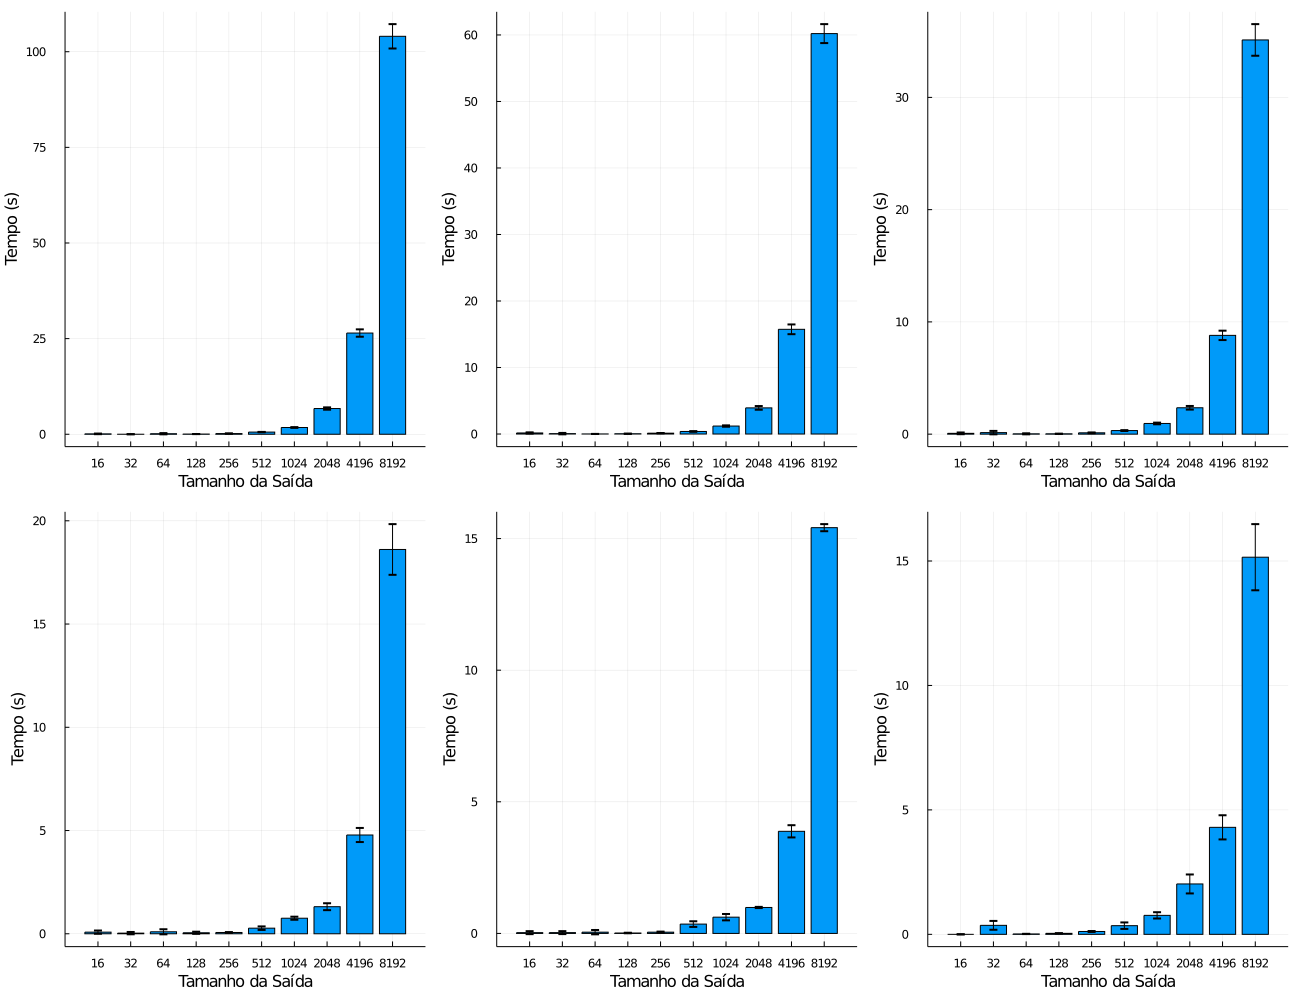

In [94]:
barTitles = legends .* " - Seahorse"
plot(p[7], p[8], p[9], p[10], p[11], p[12],
     titles = barTitles, layout = (2,3))
plot!(size=(1300,1000))

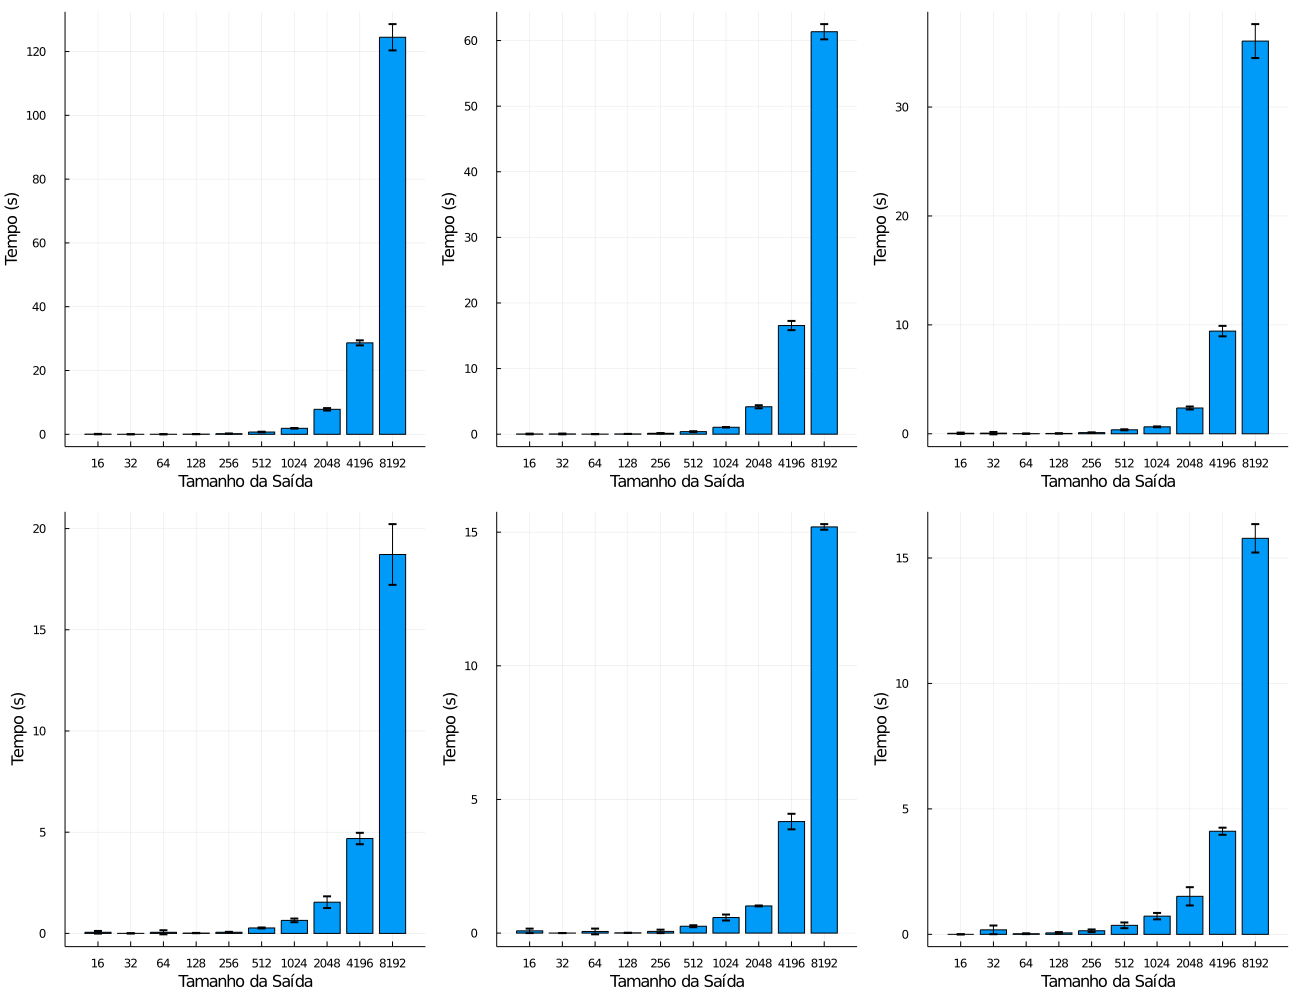

In [95]:
barTitles = legends .* " - Triple Spiral"
plot(p[13], p[14], p[15], p[16], p[17], p[18],
     titles = barTitles, layout = (2,3))
plot!(size=(1300,1000))

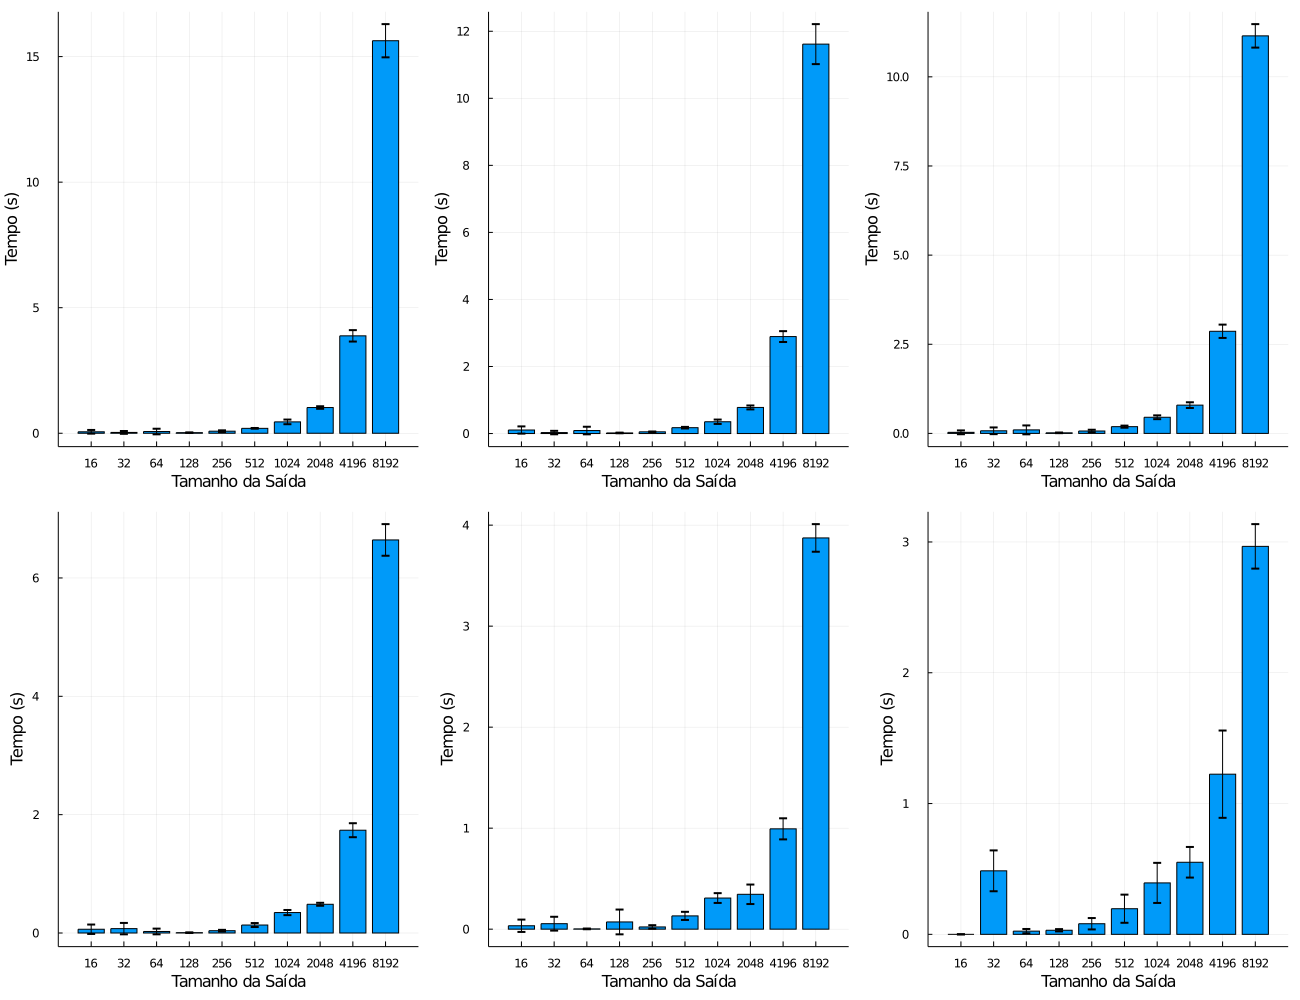

In [96]:
barTitles = legends .* " - Full Picture"
plot(p[19], p[20], p[21], p[22], p[23], p[24],
     titles = barTitles, layout = (2,3))
plot!(size=(1300,1000))